<html>
    <summary></summary>
         <div> <p></p> </div>
         <div style="font-size: 20px; width: 800px;"> 
              <h1>
               <left>Intro to Basic Probability and Statistics: Distributions, Sampling, and Expectations.</left>
              </h1>
              <p><left>============================================================================</left> </p>
<pre>Course: BIOM 480A5, Spring 2025
Instructor: Brian Munsky
Authors: Huy Vo, Ania Baetica, Brian Munsky
Contact Info: munsky@colostate.edu
</pre>
         </div>
    </p>

</html>

<details>
  <summary>Copyright info</summary>

```
Copyright 2024 Brian Munsky

Redistribution and use in source and binary forms, with or without modification, are permitted provided that the following conditions are met:

1. Redistributions of source code must retain the above copyright notice, this list of conditions and the following disclaimer.

2. Redistributions in binary form must reproduce the above copyright notice, this list of conditions and the following disclaimer in the documentation and/or other materials provided with the distribution.

3. Neither the name of the copyright holder nor the names of its contributors may be used to endorse or promote products derived from this software without specific prior written permission.

THIS SOFTWARE IS PROVIDED BY THE COPYRIGHT HOLDERS AND CONTRIBUTORS "AS IS" AND ANY EXPRESS OR IMPLIED WARRANTIES, INCLUDING, BUT NOT LIMITED TO, THE IMPLIED WARRANTIES OF MERCHANTABILITY AND FITNESS FOR A PARTICULAR PURPOSE ARE DISCLAIMED. IN NO EVENT SHALL THE COPYRIGHT HOLDER OR CONTRIBUTORS BE LIABLE FOR ANY DIRECT, INDIRECT, INCIDENTAL, SPECIAL, EXEMPLARY, OR CONSEQUENTIAL DAMAGES (INCLUDING, BUT NOT LIMITED TO, PROCUREMENT OF SUBSTITUTE GOODS OR SERVICES; LOSS OF USE, DATA, OR PROFITS; OR BUSINESS INTERRUPTION) HOWEVER CAUSED AND ON ANY THEORY OF LIABILITY, WHETHER IN CONTRACT, STRICT LIABILITY, OR TORT (INCLUDING NEGLIGENCE OR OTHERWISE) ARISING IN ANY WAY OUT OF THE USE OF THIS SOFTWARE, EVEN IF ADVISED OF THE POSSIBILITY OF SUCH DAMAGE.
```
<details>



# **Learning Objectives**
![alt text](figuresA/image001.png)

In [30]:
# Uncomment the following the first time if you do not have sympy or seaborn installed:
# !pip install sympy
# !pip install seaborn

import numpy as np
import scipy as sp
import sympy as sym
import matplotlib.pyplot as plt
import numpy.random as rng
import scipy.stats as stats
import seaborn as sns
from typing import Union # for code annotation


In [31]:
# Make sure that the user is usig the currect working directory
import os
path = os.getcwd()
# Get the folder name
folder = os.path.basename(path)

print('Checking current directory...')
if folder == 'Module3-Statistics':
    print(f'You are currently in the correct directory: {folder}')
elif folder == '480A5CourseMaterials':
    os.chdir('Module3-Statistics')
    print('Changed to Module3-Statistics directory')
else:
    print('You are in the wrong directory. Navigate to the Module3-Statistics directory and try again')

Checking current directory...
You are currently in the correct directory: Module3-Statistics


# **1. Random Numbers**
![alt text](figuresA/image002.png)

A random variable is a quantity $X$ whose precise value is _uncertain_. For example, the number of cells in the next microscope field of view you image or the height of the first person you see on the street tomorrow are random variables.

If $X$ can only take integer values $0,1,2,\ldots$ we say that $X$ is a __discrete random variable__. If $X$ can take the whole range of real values in $\mathbb{R}$, we say that $X$ is a __continuous random variable__. There are random variables that can behave discretely in some domain and continuously in others, but for the purpose of the summer school we will only focus on these two types.

# **2. Probability Distributions**

## **2.A. Probability Mass Functions and Probability Density Functions**
![alt text](figuresA/image003.png)

When $X$ is discrete, the __probability mass function__ (PMF) of $X$ gives us the probability for it to take on each possible specific value $n=0,1,2,\ldots$:
$$
p_{X}(n) = \mathrm{Pr}\left(X = n\right).
$$

When $X$ is continuous, we are interested in the __probability density function__ (PDF) of $X$, defined as a function $f_X(x)$ taking nonnegative values such that
$$
\int_a^b{f_X(x)\mathrm{dx}} = \mathrm{Pr}(a \leq X \leq b).
$$

## **2.B. Cumulative Probability Distributions**
![alt text](figuresA/image004.png)

# **3. Common Probability Distributions**
## **3.A. Common Discrete Distrbutions**
There are several discrete distributions that we will encounter in this class.  The most important are Bernoulli, Binomial, and Poisson.

### **3.A.1. Bernoulli Distribution**
![alt text](figuresA/image011B.png)

The Bernoulli distribution is used to model a binary reponse $Y$ that, without loss of generality, we assume to be either $0$ or $1$. Its probability mass function is given by
$$
\mathrm{Ber}\left(y\vert \theta\right)
:=
\begin{cases}
1-\theta \;\;\text{if }y=0\\
\theta \;\;\text{if }y=1
\end{cases}
$$
where $\theta$ is the parameter of the distribution. This parameter has the clear interpretation as the probability for $Y$ to take value $1$. You can use this distribution to model a _single occurence_ of a trial that has binary outcomes, such as the a single coin flip.

The Bernoulli distribution is important for understanding binary classification (e.g., in machine learning).

* What is the mean of a Bernoulli random variable?

* What is it's standard deviation?

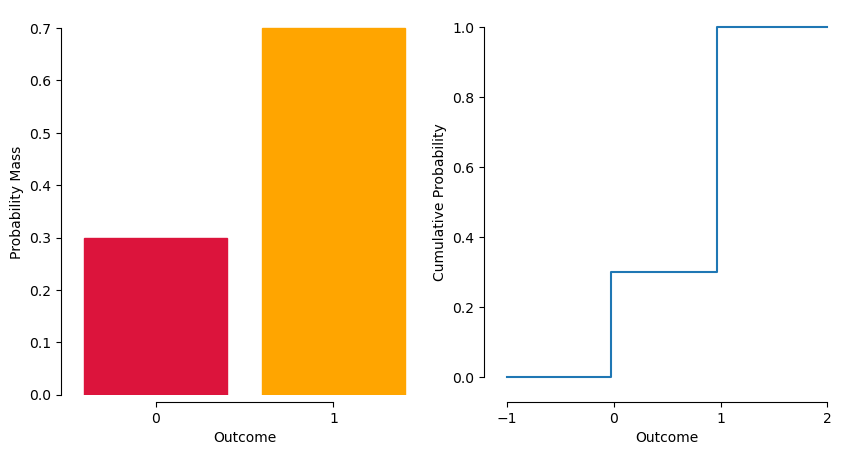

In [32]:
# Example for using Bernoulli random variables
from scipy.stats import bernoulli

theta = 0.7  # probability of success - change this value to see the effect

# Create a Bernoulli random variable
ber_rv = bernoulli(p = theta)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function, 
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar([0, 1], ber_rv.pmf([0, 1]))
ax[0].set_xticks([0, 1])
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson") if i == 0 else bar.set_color("orange")

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(-1, 2, 100)
ax[1].step(x, ber_rv.cdf(x))
ax[1].set_xticks([-1, 0, 1, 2])
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### **3.A.2. Binomial Distribution**
![alt text](figuresA/image012.png)

Let $S = X_1 + X_2 + \ldots + X_n$ where $n$ is a fixed integer and $X_1,\ldots, X_n$ are __independent__ random variables that are distributed according to the Bernoulli distribution with the __same__ parameter $p$. Then $S$ will be a discrete random variable with a __Binomial Distribution__ with parameters $n$ and $p$, and we write $S\sim \mathrm{Binomial}(n;p)$. It has the probability mass function
$$
\mathrm{Pr}(S = y) = \mathrm{Binomial}(y \vert n, p) := \left(\begin{array}{c} n\\y \end{array} \right) p^y(1-p)^{n-y}.
$$

Here
$$
\left(\begin{array}{c} n\\y \end{array} \right)  := \frac{
    n!
}{
    (n-y)!y!
}
$$
is pronounced "_n choose y_" and is the total number of ways to take $y$ objects without replacement from a set of $n$ objects.

The binomial distribution models the number of heads you get when flipping a coin $n$ times, where the probability of getting head in each flip is p. It could also model the probability distribution for how many cells will have a given phenotype when you measure $n$ total cells and the phenotype probability is $p$.

* What is the mean of a Binomial random variable?
* What is the variance and standard deviation?

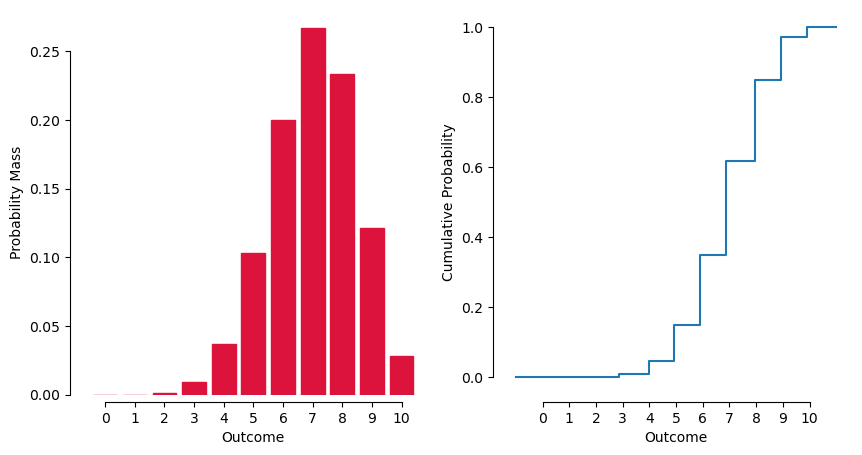

In [33]:
# Example for using Binomial random variables
from scipy.stats import binom

n = 10  # number of trials - change this value to see the effect
p = 0.7  # probability of success - change this value to see the effect

# Create a Binomial random variable
bin_rv = binom(n = n, p = p)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(n+1), bin_rv.pmf(range(n+1)))
ax[0].set_xticks(range(n+1))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(-1, n+1, 100)
ax[1].step(x, bin_rv.cdf(x))
ax[1].set_xticks(range(n+1))
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### **3.A.3. Poisson Distribution**
![alt text](figuresA/image013.png)

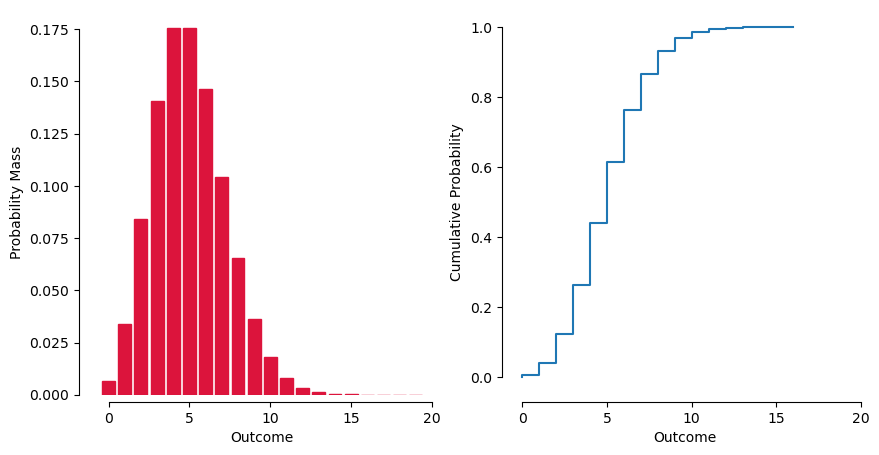

In [34]:
# Example for using Poisson random variables
from scipy.stats import poisson

lambda_ = 5  # rate of events - change this value to see the effect

# Create a Poisson random variable
poi_rv = poisson(mu = lambda_)
# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(20), poi_rv.pmf(range(20)))

ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")
xticks = ax[0].get_xticks()

# The second one is a stair plot of the cumulative distribution function
x = np.arange(-1, 3*lambda_+1)
ax[1].step(x+1, poi_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()



### **3.A.4. Geometric Distribution**
![alt text](figuresA/image014.png)

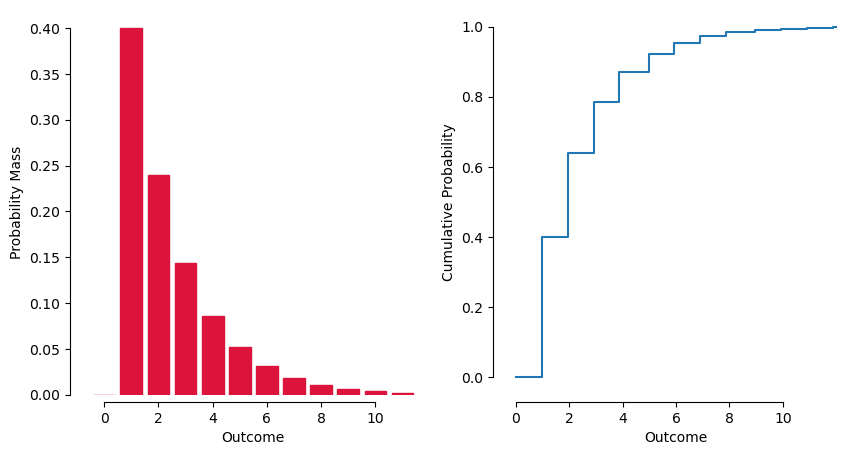

In [35]:
# Example for using Geometric random variables
from scipy.stats import geom

p = 0.4  # probability of success - change this value to see the effect

# Create a Geometric random variable
geo_rv = geom(p = p)

# Make two plots to show the PMF and the CDF:
# The first one is a bar chart of the probability mass function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
bplot = ax[0].bar(range(0, int(5/p)), geo_rv.pmf(range(0, int(5/p))))
# ax[0].set_xticks(range(1, 11))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Mass")
sns.despine(offset=5, trim=True)
for i, bar in enumerate(bplot):
  bar.set_color("crimson")
xticks = ax[0].get_xticks()

# The second one is a stair plot of the cumulative distribution function
x = np.linspace(0, int(5/p), 100)
ax[1].step(x, geo_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

## **3.B. Common Continuous Distributions**

### **3.B.1. Uniform Distribution**

A continuous random variable $X$ is said to have a **uniform distribution** with parameters $a$ and $b$ (with $a< b$), denoted by $X\sim U(a,b)$, if its probability density function is given by
$$
f_X(x) = \frac{
    1
}{
    b-a
}\mathbb{1}(a\leq x \leq b)
$$
where $\mathbb{1}(A)=0$ if statement $A$ is false and $1$ otherwise. This distribution will be essential in implementing stochastic simulation algorithm and Metropolis-Hastings algorithm later in the course.

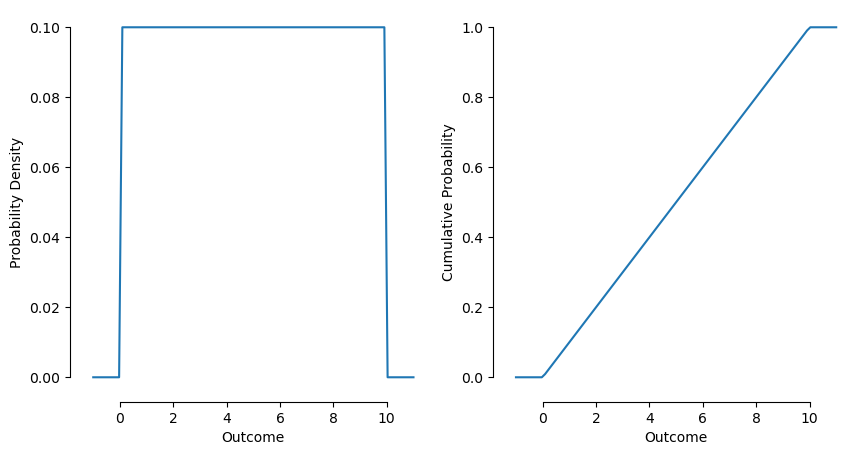

In [36]:
# Example for using Uniform random variables
from scipy.stats import uniform

a = 0  # lower bound - change this value to see the effect
b = 10  # upper bound - change this value to see the effect

# Create a Uniform random variable
uni_rv = uniform(loc = a, scale = b - a)

# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(a-1, b+1, 100)
ax[0].plot(x, uni_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
x = np.linspace(a-1, b+1, 100)
ax[1].plot(x, uni_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### **3.B.2. Exponential Distribution**
![alt text](figuresA/image017.png)

The exponential distribution will be very important later in the course when we explore the wating times between stochastic events that describe gene regulatory changes.

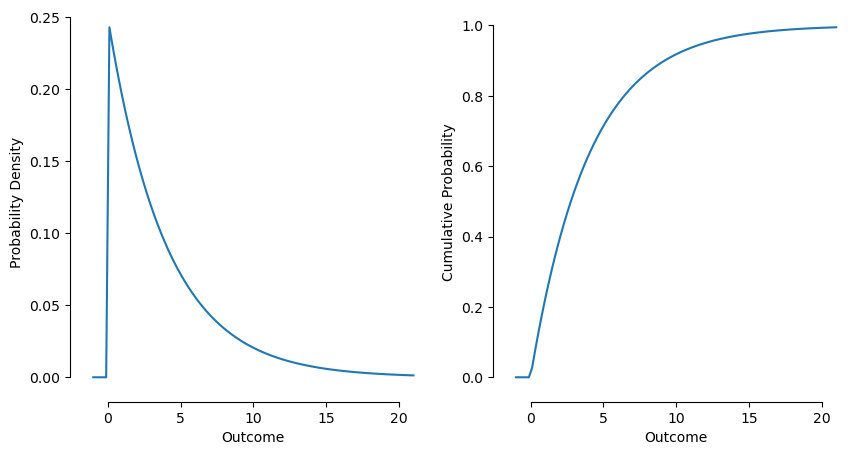

In [37]:
# Example for using Exponential random variables
from scipy.stats import expon

lambda_ = 0.25  # rate of events - change this value to see the effect

# Create an Exponential random variable
exp_rv = expon(scale = 1/lambda_)
# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(-1, int(5/lambda_+1), 100)
ax[0].plot(x, exp_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
x = np.linspace(-1, int(5/lambda_+1), 100)
ax[1].plot(x, exp_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

### **3.B.3. Gaussian Distribution**

A continuous random variable $X$ has a normal distribution with parameters $\mu$ and $\sigma^2$, written $X\sim N(\mu, \sigma^2)$ if it has probability density function
$$
f_X(x) = \frac{
    1
}{
    \sqrt{2\pi\sigma^2}
}\exp\left(-\frac{
    1
}{
    2
}\left(\frac{
    x-\mu
}{
    \sigma
}\right)^2\right).
$$


An important special case of the normal distribution is the standard normal distribution $N(0,1)$ which has parameters $\mu=0$ and $\sigma^2=1$.

The normal distribution has a very important role in statistics. One reason is that many random quantitites tend to be approximately normally distributed for large sample size. Specifically, the Central Limit Theorem (CLT) states that for random variables $X_1,\ldots, X_n$ that are independent and identically distributed with the same mean $\mu$ and variance $\sigma^2$, and let
$$
\overline{X}:=\frac{
    X_1+\ldots+X_n
}{
    n
}$$
be the sample mean, then the distribution of the random variable $$Z:=\sqrt{n}\left(\frac{
    \overline{X} - \mu
}{
    \sigma
}\right)$$
is well-approximated by a standard normal distribution $N(0,1)$ when $n$ is large.


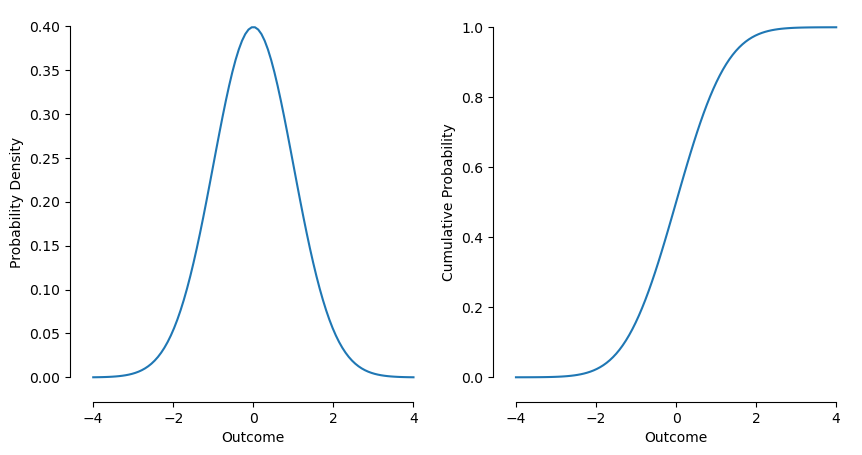

In [38]:
# Example for using Normal random variables
from scipy.stats import norm

mu = 0  # mean - change this value to see the effect
sigma = 1  # standard deviation - change this value to see the effect

# Create a Normal random variable
norm_rv = norm(loc = mu, scale = sigma)

# Make two plots to show the PDF and the CDF:
# The first one is a line plot of the probability density function,
fig, ax = plt.subplots(1,2, figsize=(10, 5))
x = np.linspace(-mu-4*sigma, mu+4*sigma, 100)
ax[0].plot(x, norm_rv.pdf(x))
ax[0].set_xlabel("Outcome")
ax[0].set_ylabel("Probability Density")
sns.despine(offset=5, trim=True)
xticks = ax[0].get_xticks()

# The second one is a line plot of the cumulative distribution function
ax[1].plot(x, norm_rv.cdf(x))
ax[1].set_xticks(xticks)
ax[1].set_xlabel("Outcome")
ax[1].set_ylabel("Cumulative Probability")
sns.despine(offset=5, trim=True)
plt.show()

# **4. Sampling from distributions**

## **4.A. Sampling From Common Distributions using Numpy**

Numpy provides a very nice random sampling library that is widely used throughout scientific computing.

```np.random.____```

| Method    | Description  |
| ----------- | ----------- |
| rand | uniform random from 0 to 1|
| randn | univariate normal from a mean of 0 and a variance of 1 |
| randint| random integers from low to high|
| choice | pick a uniform random value from an array |
| shuffle | shuffles an array along the first axis|

Additionally np.random can sample from a list of statistical distributions, heres a short list:

| Distribution    |
| ----------- |
| [beta](https://en.wikipedia.org/wiki/Beta_distribution) |
| [gamma](https://en.wikipedia.org/wiki/Gamma_distribution) |
| [lognormal](https://en.wikipedia.org/wiki/Log-normal_distribution)|
| [multivariate normal](https://en.wikipedia.org/wiki/Multivariate_normal_distribution) |
| [poisson](https://en.wikipedia.org/wiki/Poisson_distribution) |
| [uniform](https://en.wikipedia.org/wiki/Continuous_uniform_distribution) |  
| [power](https://en.wikipedia.org/wiki/Power_law) |


We can additionally set the rng state with np.random.seed(integer)

| Method    | Description  |
| ----------- | ----------- |
| seed | set the seed of the RNG |
| get_state | get the current state of the mersenne twister |

---

```Reading: Kinder, Nelson Section 6.2```

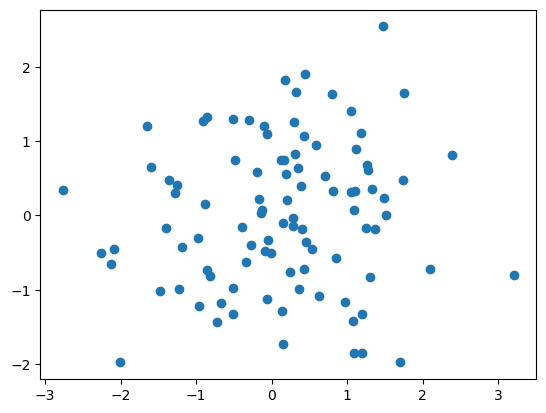

In [39]:
# Generating some simple random data points and plotting them
n = 96 #number of data points to sample

randomNumberGenerator = 'randn' #e.g., "rand", "randn", "randint"
examples_str = {'rand': rng.rand(2,n),
            'randn': rng.randn(2,n),
            'randint': rng.randint(0,1000,size = (2,n))}

# Run the example string to generate the random numbers
random_numbers = examples_str[randomNumberGenerator]

# Plot the random numbers as 2D points
plt.plot(random_numbers[0],random_numbers[1],'o' )

/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_40350/2832175815.py:12: RuntimeWarning: covariance is not symmetric positive-semidefinite.
  random_numbers = rng.multivariate_normal(np.array([mean1,mean2]), cov, size=n).T


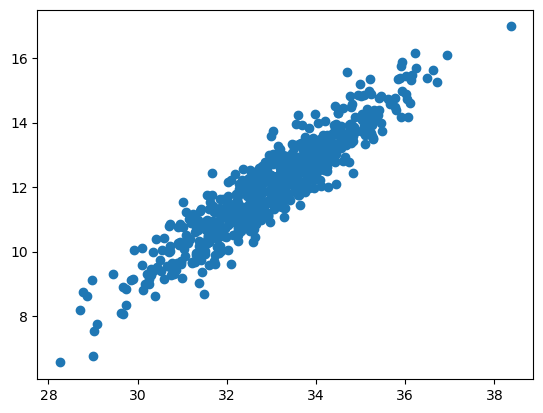

In [40]:
# Generating some multivariate Normal (Gaussian) data points and plotting them
import matplotlib.pyplot as plt
import numpy.random as rng

n = 674     # Number of data points to sample
mean1 = 33  # Mean of the first dimension
mean2 = 12  # Mean of the second dimension
cov = rng.randn(2,2)*3      # Covariance matrix
cov[0,0] = 2; cov[1,1] = 2;

# Generate the data
random_numbers = rng.multivariate_normal(np.array([mean1,mean2]), cov, size=n).T

# Plot the data
plt.plot(random_numbers[0],random_numbers[1],'o' )

/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_40350/1989406042.py:14: RuntimeWarning: divide by zero encountered in log
  pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
/var/folders/gs/29wgt2xj1jj873ytknj55rsr0000gp/T/ipykernel_40350/1989406042.py:14: RuntimeWarning: invalid value encountered in divide
  pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))


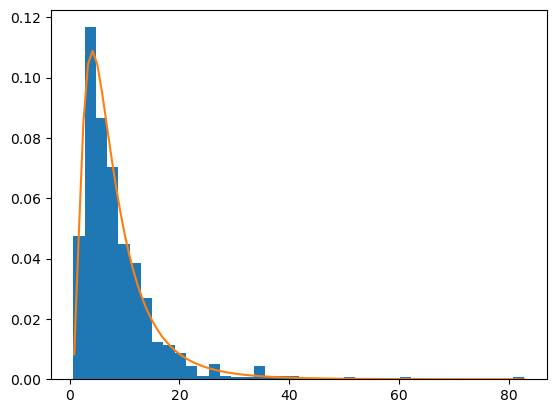

In [41]:
# Creating histograms of log-normal data
n = 781     # Number of data points to sample
mean = 1.9  # Mean of the lognormal distribution
sigma = 0.7 # Log-Standard deviation of the lognormal distribution

# Generate the data
random_numbers = rng.lognormal(mean,sigma, size=(n))

# Plot the histogram of the data
plt.hist(random_numbers,density=True,bins=40 )

# Add the analytical LogNormal PDF to the plot
x = np.linspace(0,max(random_numbers),100)
pdf = np.exp(-(np.log(x)-mean)**2/(2*sigma**2))/(x*sigma*np.sqrt(2*np.pi))
plt.plot(x,pdf)

The sample mean of the poisson data is 60.4
The sample variance of the poisson data is 60.33


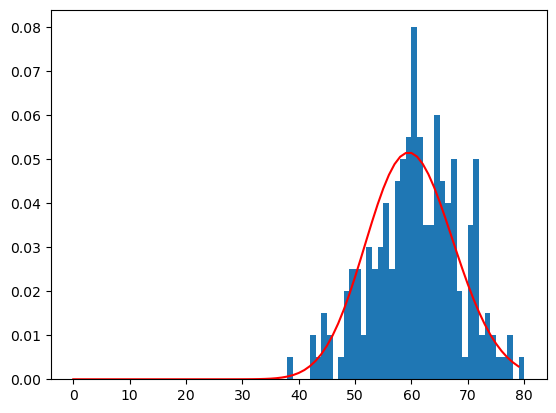

In [42]:
# Creating histogram of some Poisson data
n = 200 # Number of data points to sample
lam = 60 # Poisson parameter (mean)

# Generate the data
random_numbers = rng.poisson(lam, size=(n))

print(f'The sample mean of the poisson data is {np.mean(random_numbers)}')
print(f'The sample variance of the poisson data is {np.var(random_numbers)}')

# Plot histogram of the data and compare it to the Poisson distribution
plt.hist(random_numbers,density=True,bins=range(max(random_numbers)+1), align='mid')

# Add the analytical Poisson distribution to the plot
from scipy.stats import poisson
x = range(max(random_numbers))
plt.plot(x, poisson.pmf(x, lam), 'r-', ms=8, mec='r')

## **4.B. Sampling arbitrary distributions using the Inverse Transform Sampling method.**
![alt text](figuresA/image007.png)

### 4.B.1. Example for sampling from an arbitrary discrete distribution using the inverse transform method

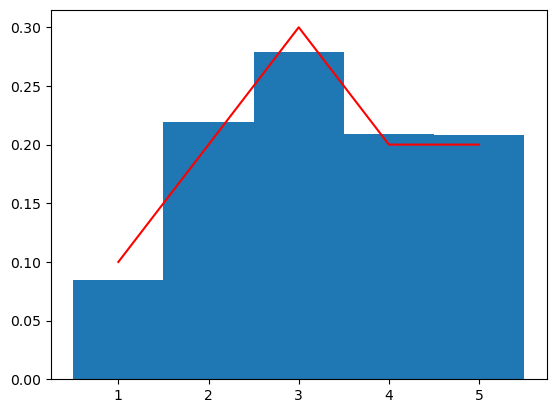

In [43]:
# Example for sampling from an arbitrary discrete distribution using the inverse transform method
# Define the discrete distribution
x = [1, 2, 3, 4, 5] # The outcomes
p = [0.1, 0.2, 0.3, 0.2, 0.2] # The probabilities of the outcomes

# Create the cumulative distribution function
cdf = np.cumsum(p)

# Sample from the distribution
n = 1000
samples = np.zeros(n)
for i in range(n):
    u = rng.rand()
    samples[i] = x[np.argmax(cdf > u)]
    
# Plot the histogram of the samples
plt.hist(samples,density=True,bins=range(1,7), align='left')

# Add the analytical distribution to the plot
plt.plot(x, p, 'r-', ms=8, mec='r')

### 4.B.2. Example for sampling from an arbitrary continuous distribution using the inverse transform method

The inverse of the CDF is [2.0*log(-1/(u - 1.0))]


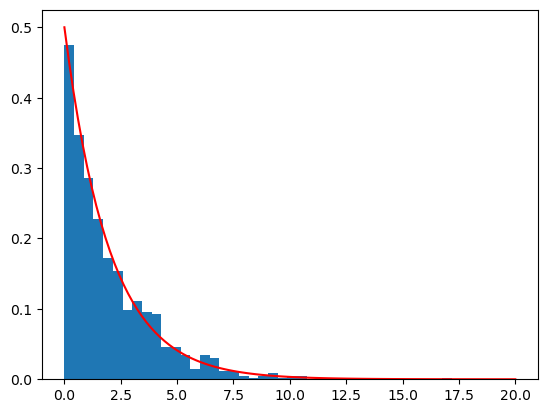

In [44]:
# Example for sampling from an arbitrary continuous distribution using the inverse transform method
# Define the continuous distribution
# Create a probability density function using sympy
x = sym.symbols('x')
lam = 0.5
pdf_sym = lam*sym.exp(-lam*x) # The probability density function

# Create the cumulative distribution function (by integrating the PDF from 0 to x)
cdf_sym = sym.integrate(pdf_sym, (x, 0, x))

# Create the inverse of the cumulative distribution function (by solving the relation "u = CDF(x)" for x)
cdf_inv_sym = sym.solve(cdf_sym - sym.symbols('u'), x)

print(f'The inverse of the CDF is {cdf_inv_sym}')

# Create a function to convert uniform random numbers U(0,1) to samples from the distribution
sample = sym.lambdify(sym.symbols('u'), cdf_inv_sym)

# Sample from the distribution
n = 1000
samples = sample(rng.rand(n))

# Plot the histogram of the samples
plt.hist(samples,density=True,bins=40)

# Add the analytical distribution to the plot
x = np.linspace(0,20,100)
pdf = lam*np.exp(-lam*x)
plt.plot(x, pdf, 'r-', ms=8, mec='r')

# **5. Computing expectations from distributons and summary statistics from samples**

## **5.A. Expectations of a random variable**
![alt text](figuresA/image005.png)

## **5.B. Summary statistics from samples**
![alt text](figuresA/image006.png)

In [45]:
# Examples for computing expected values (means and variances) from a discrete distribution

# Try one of the following discrete distributions
dist = binom(n = 20, p = 0.3) # Create a Poisson distribution with lambda = 5
# dist = poisson(mu = 5) # Create a Poisson distribution with lambda = 5
# dist = geom(p = 0.53) # Create a Poisson distribution with lambda = 5

f = lambda x: x**1.3 # Create a function to compute the expected value of. E.g., f(x) = x^(1.3)
distRange = np.arange(25) # Create a range of values from 0 to 19

pdf = dist.pmf(distRange) # Compute the PMF of the distribution
mean = np.sum(pdf*distRange) # Compute the mean of the distribution
variance = np.sum(pdf*(distRange-mean)**2) # Compute the variance of the distribution    
f_mean = np.sum(pdf*f(distRange)) # Compute the expected value of f(x)

print(f'The computed mean of this distribution is {mean}')
print(f'The computed variance of this distribution is {variance}')
print(f'The computed mean of function f(x) is {f_mean}')

# Compare to the built-in methods
print(f'The mean of this distribution is {dist.mean()}')
print(f'The variance of this distribution is {dist.var()}')

# Now let's sample from the distribution and compute the sample mean and variance
n = 1000 # Number of samples to draw
samples = dist.rvs(size=n) # Draw n samples from the distribution   
sampleMean = np.mean(samples) # Compute the sample mean 
sampleVariance = np.var(samples) # Compute the sample variance  
samplefMean = np.mean(f(samples)) # Compute the sample mean of f(x)

print(f'The sample mean of this distribution for {n} samples is {sampleMean}')
print(f'The sample variance of this distribution for {n} samples is  {sampleVariance}')
print(f'The sample mean of function f(x) for {n} samples is {samplefMean}')

The computed mean of this distribution is 5.999999999999998
The computed variance of this distribution is 4.199999999999997
The computed mean of function f(x) is 10.509371983392828
The mean of this distribution is 6.0
The variance of this distribution is 4.2
The sample mean of this distribution for 1000 samples is 5.953
The sample variance of this distribution for 1000 samples is  4.346791
The sample mean of function f(x) for 1000 samples is 10.414191381790632


In [46]:
# Examples for computing expected values (means and variances) from a continuous distribution

# Try one of the following continuous distributions
dist = uniform(loc = 0, scale = 10) # Create a Uniform distribution with a = 0 and b = 10
# dist = expon(scale = 1/3) # Create a Exponential distribution with lambda = 3
# dist = norm(loc = -3, scale = 2) # Create a Normal distribution with mean = -3 and standard deviation = 2 

f = lambda x: x**4 # Create a function to compute the expected value of. E.g., f(x) = x^(4)

distRange = np.linspace(-30,30,10000) # Create a range of values from 0 to 19
stepSize = distRange[1]-distRange[0] # Compute the step size of the range

pdf = dist.pdf(distRange) # Compute the PDF of the distribution
mean = np.sum(pdf*distRange)*stepSize # Compute the mean of the distribution
variance = np.sum(pdf*(distRange-mean)**2)*stepSize  # Compute the variance of the distribution    
f_mean = np.sum(pdf*f(distRange))*stepSize # Compute the expected value of f(x)

print(f'The computed mean of this distribution is {mean}')
print(f'The computed variance of this distribution is {variance}')
print(f'The computed mean of function f(x) is {f_mean}')

# Compare to the built-in methods
print(f'The mean of this distribution is {dist.mean()}')
print(f'The variance of this distribution is {dist.var()}')

# Now let's sample from the distribution and compute the sample mean and variance
n = 1000 # Number of samples to draw
samples = dist.rvs(size=n) # Draw n samples from the distribution   
sampleMean = np.mean(samples) # Compute the sample mean 
sampleVariance = np.var(samples) # Compute the sample variance  
samplefMean = np.mean(f(samples)) # Compute the sample mean of f(x)

print(f'The sample mean of this distribution for {n} samples is {sampleMean}')
print(f'The sample variance of this distribution for {n} samples is  {sampleVariance}')
print(f'The sample mean of function f(x) for {n} samples is {samplefMean}')

The computed mean of this distribution is 5.003000750119569
The computed variance of this distribution is 8.340835585058656
The computed mean of function f(x) is 2003.001500269815
The mean of this distribution is 5.0
The variance of this distribution is 8.333333333333332
The sample mean of this distribution for 1000 samples is 4.989779848322481
The sample variance of this distribution for 1000 samples is  8.64032556038946
The sample mean of function f(x) for 1000 samples is 2043.5434283479772


# **6. Probability and Moment Generating Functions** (Optional)

## **6.A. Probability Generating Functions** (Disrete Random Variables)
A probability generating function (PGF) is a power series representation of the probability mass function of a discrete random variable. It is defined as
$$
G_X(z) = \sum_{n=0}^{\infty} p_X(n)z^n
$$
where $p_X(n)$ is the probability mass function of the random variable $X$. If we know the PGF of a random variable, we can calculate the probability of any event involving the random variable. For example, if we know $G_X(z)$, we can calculate the probability that $X$ is a specific value $n$ by taking the $n$-th derivative of $G_X(z)$ and evaluating it at $z=0$.

Note, the z-transform used here is a discrete generalization of the Laplace transform. This transform is frequently used in signal processing and control theory.

## **6.B. Moment Generating Functions** (Discrete Random Variables)
The moment generating function (MGF) is a power series representation of the probability mass function of a discrete random variable. It is defined as
$$
M_X(t) = \sum_{n=0}^{\infty} p_X(n)e^{tn}
$$
where $p_X(n)$ is the probability mass function of the random variable $X$. The MGF is a useful tool for calculating the moments of a random variable. 

In the MGF, $t$ is a dummy variable. To get the $n$-th central moment of $X$, we can take the $n$-th derivative of the MGF and evaluate it at $t=0$.

The relationship between the PGF and MGF is that the MGF is the PGF evaluated at $z=e^t$.

## **6.C. Examples of Discrete Distributions and their PGFs/MGFs**
### **6.C.1. Example -- Bernoulli Distribution**
the **Probability Generating Function (PGF)** of a **Bernoulli random variable** $X$ is given by
$$
G_X(z) = (1-\theta) + \theta z
$$
where $\theta$ is the probability of success.

Let's find the probability that $X$ is equal to 0 or 1 using the PGF:
$$
\begin{align*}
\mathrm{Pr}(X=0) &= G_X(0) = 1-\theta\\
\mathrm{Pr}(X=1) &= G_X(1) = \theta
\end{align*}
$$
This shows how the PGF can be used to calculate the probability of specific events involving the random variable.

The **Moment Generating Function (MGF)** of a **Bernoulli random variable** $X$ is found from the PGF by evaluating it at $z=e^t$:
$$
M_X(t) = (1-\theta) + \theta e^t
$$
The $n$-th central moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second central moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \theta\\
\mathrm{E}[X^2] &= M_X''(0) = \theta(1-\theta) + \theta^2
\end{align*}
$$
This shows how the MGF can be used to calculate the moments of a random variable.

**Bernoulli Distribution Example in Python:**

In [47]:
# Example of the PGF of Bernoulli random variables
from sympy.abc import z
t = sym.symbols('t')

theta = 0.7 # Probability of success
pgf = (1-theta) + theta*z  # The PGF of a Bernoulli random variable

# Get the probability mass function from the PGF
for i in range(2):
    print(f'P(X = {i}) = {sym.diff(pgf,z,i).subs(z,0)}')

# Compute the mean and variance of the Bernoulli random variable
mgf = pgf.subs(z, sym.exp(t)) # The MGF of the Bernoulli random variable
mean = sym.diff(mgf, t).subs(t,0) # Compute the mean
secondMoment = sym.diff(mgf, t, 2).subs(t,0) # Compute the variance
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Bernoulli random variable is {mean}')
print(f'The variance of the Bernoulli random variable is {variance}')

# Check against the built-in methods
ber_rv = bernoulli(p = theta)
print(f'The (built in) mean of the Bernoulli random variable is {ber_rv.mean()}')
print(f'The (built in) variance of the Bernoulli random variable is {ber_rv.var()}')


P(X = 0) = 0.300000000000000
P(X = 1) = 0.700000000000000
The mean of the Bernoulli random variable is 0.700000000000000
The variance of the Bernoulli random variable is 0.210000000000000
The (built in) mean of the Bernoulli random variable is 0.7
The (built in) variance of the Bernoulli random variable is 0.21000000000000002


### **6.C.2. Example -- Binomial Distribution**
The **PGF** of a **binomial random variable** $X$ is given by
$$
G_X(z) = (1-\theta + \theta z)^n
$$
where $\theta$ is the probability of success and $n$ is the number of trials.

Let's find the probability that $X$ is equal to $k$ using the PGF:
$$
\begin{align*}
\mathrm{Pr}(X=k) &= \left.\frac{1}{k!}\frac{d^k}{dz^k}G_X(z)\right|_{z=0} = \left.\frac{1}{k!}\frac{d^k}{dz^k}(1-\theta + \theta z)^n\right|_{z=0}
\end{align*}
$$
This shows how the PGF can be used to calculate the probability of specific events involving the random variable.

The **MGF** of a **binomial random variable** $X$ is found from the PGF by evaluating it at $z=e^t$:
$$
M_X(t) = (1-\theta + \theta e^t)^n
$$
The $n$-th central moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second central moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = n\theta\\
\mathrm{E}[X^2] &= M_X''(0) = n\theta(1-\theta) + n\theta^2
\end{align*}
$$
This shows how the MGF can be used to calculate the moments of a random variable.

**Binomial Distribtion Example in Python:**

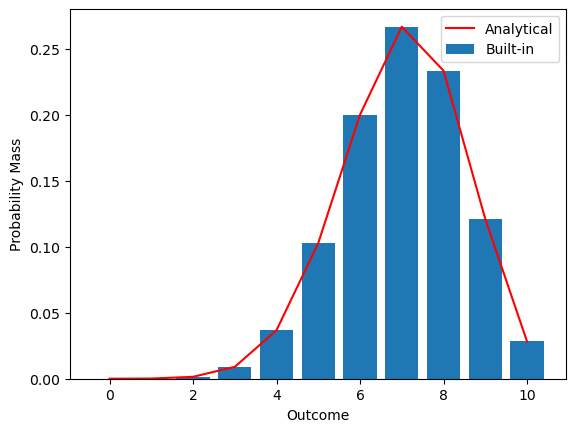

In [48]:
# Example of the PGF of Binomial random variables
from sympy.abc import z
t = sym.symbols('t')

n = 10 # Number of trials
theta = 0.7 # Probability of success
pgf = (1-theta + theta*z)**n  # The PGF of a Binomial random

# Get the probability mass function from the PGF
ProbMass = []
for i in range(n+1):
    pm = sym.diff(pgf,z,i).subs(z,0)/sym.factorial(i)
    ProbMass.append(pm)

# Plot the probability mass function and compare to the built-in method
from scipy.stats import binom
x = range(n+1)
plt.bar(x, ProbMass)
plt.plot(x, binom.pmf(x, n, theta), 'r-')
plt.legend(['Analytical', 'Built-in'])
plt.xlabel('Outcome')
plt.ylabel('Probability Mass')
plt.show()

In [49]:
# Compute the mean and variance of the Binomial random variable
mgf = pgf.subs(z, sym.exp(t)) # The MGF of the Binomial random variable
mean = sym.diff(mgf, t).subs(t,0) # Compute the mean
secondMoment = sym.diff(mgf, t, 2).subs(t,0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Binomial random variable is {mean}')
print(f'The variance of the Binomial random variable is {variance}')

# Check against the built-in methods
dist = binom(n = n, p = theta)
print(f'The (builtin) mean of the Binomial random variable is {dist.mean()}')
print(f'The (builtin) variance of the Binomial random variable is {dist.var()}')


The mean of the Binomial random variable is 7.00000000000000
The variance of the Binomial random variable is 2.10000000000002
The (builtin) mean of the Binomial random variable is 7.0
The (builtin) variance of the Binomial random variable is 2.1000000000000005


### **6.C.3. Example -- Poisson Distribution**
The **PGF** of a **Poisson random variable** $X$ is given by
$$
G_X(z) = e^{\lambda(z-1)}
$$
where $\lambda$ is the rate parameter.

Let's find the probability that $X$ is equal to $k$ using the PGF:
$$
\begin{align*}
\mathrm{Pr}(X=k) &= \left.\frac{1}{k!}\frac{d^k}{dz^k}G_X(z)\right|_{z=0} = \left.\frac{1}{k!}\frac{d^k}{dz^k}e^{\lambda(z-1)}\right|_{z=0}
\end{align*}
$$
This shows how the PGF can be used to calculate the probability of specific events involving the random variable.

The **MGF** of a **Poisson random variable** $X$ is found from the PGF by evaluating it at $z=e^t$:
$$
M_X(t) = e^{\lambda(e^t-1)}
$$

The $n$-th uncenterred moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second uncentered moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \lambda\\
\mathrm{E}[X^2] &= M_X''(0) = \lambda^2 + \lambda
\end{align*}
$$

**Poisson Distribution Example in Python:**

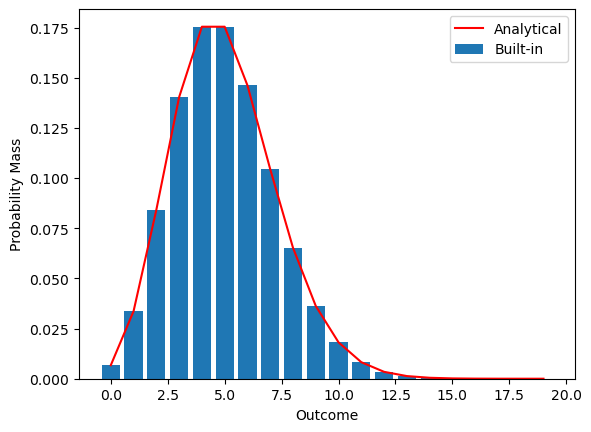

In [50]:
# Example of the PGF of Poisson random variables
from sympy.abc import z
t = sym.symbols('t')

lambda_ = 5 # Rate of events
pgf = sym.exp(lambda_*(z-1))  # The PGF of a Poisson random variable

# Get the probability mass function from the PGF
ProbMass = []
for i in range(20):
    pm = sym.diff(pgf,z,i).subs(z,0)/sym.factorial(i)
    ProbMass.append(pm)

# Plot the probability mass function and compare to the built-in method
from scipy.stats import poisson
x = range(20)
plt.bar(x, ProbMass)
plt.plot(x, poisson.pmf(x, lambda_), 'r-')
plt.legend(['Analytical', 'Built-in'])
plt.xlabel('Outcome')
plt.ylabel('Probability Mass')
plt.show()

In [51]:
# Compute the mean and variance of the Poisson random variable
mgf = pgf.subs(z, sym.exp(t)) # The MGF of the Poisson random variable
mean = sym.diff(mgf, t).subs(t,0) # Compute the mean
secondMoment = sym.diff(mgf, t, 2).subs(t,0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Poisson random variable is {mean}')
print(f'The variance of the Poisson random variable is {variance}')

# Check against the built-in methods
dist = poisson(mu = lambda_)
print(f'The (builtin) mean of the Poisson random variable is {dist.mean()}')
print(f'The (builtin) variance of the Poisson random variable is {dist.var()}')

The mean of the Poisson random variable is 5
The variance of the Poisson random variable is 5
The (builtin) mean of the Poisson random variable is 5.0
The (builtin) variance of the Poisson random variable is 5.0


### **6.C.4. Example -- Geometric Distribution**
The **PGF** of a **geometric random variable** $X$ is given by
$$
G_X(z) = \frac{\theta z}{1-(1-\theta)z}
$$
where $\theta$ is the probability of success.  

Please note -- in this formulation, the support of the geometric distribution is $k=0,1,2,\ldots$. 

Let's find the probability that $X$ is equal to $k$ using the PGF:
$$
\begin{align*}
\mathrm{Pr}(X=k) &= \left.\frac{1}{k!}\frac{d^k}{dz^k}G_X(z)\right|_{z=0} = \left.\frac{1}{k!}\frac{d^k}{dz^k}\frac{\theta z}{1-(1-\theta)z}\right|_{z=0}
\end{align*}
$$

The **MGF** of a **geometric random variable** $X$ is found from the PGF by evaluating it at $z=e^t$:
$$
M_X(t) = \frac{\theta e^t}{1-(1-\theta)e^t}
$$

The $n$-th uncenterred moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second uncentered moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \frac{1}{\theta}\\
\mathrm{E}[X^2] &= M_X''(0) = \frac{2-\theta}{\theta^2}
\end{align*}
$$

**Geometric Distribution Example in Python:**

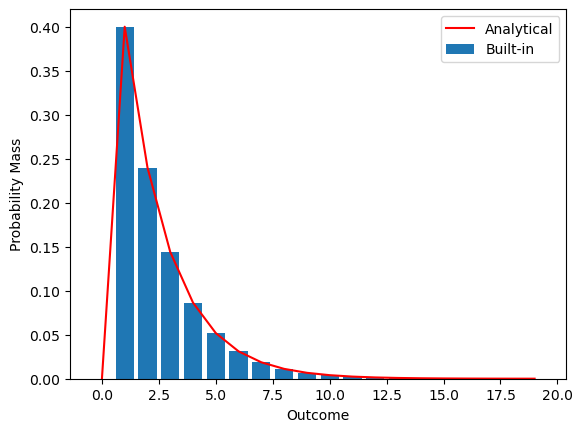

In [52]:
# Example of the PGF of Geometric random variables
from sympy.abc import z
t = sym.symbols('t')

p = 0.4 # Probability of success
pgf = p*z/(1-(1-p)*z)  # The PGF of a Geometric random variable

# Get the probability mass function from the PGF
ProbMass = [sym.diff(pgf,z,i).subs(z,0)/sym.factorial(i) for i in range(20)]

# Plot the probability mass function and compare to the built-in method
from scipy.stats import geom
x = range(20)
plt.bar(x, ProbMass)
plt.plot(x, geom.pmf(x, p), 'r-')  
plt.legend(['Analytical', 'Built-in'])
plt.xlabel('Outcome')
plt.ylabel('Probability Mass')
plt.show()

In [53]:
# Compute the mean and variance of the Geometric random variable
mgf = pgf.subs(z, sym.exp(t)) # The MGF of the Geometric random variable
mean = sym.diff(mgf, t).subs(t,0) # Compute the mean
secondMoment = sym.diff(mgf, t, 2).subs(t,0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Geometric random variable is {mean}')
print(f'The variance of the Geometric random variable is {variance}')

# Check against the built-in methods
dist = geom(p = p)
print(f'The (builtin) mean of the Geometric random variable is {dist.mean()}')
print(f'The (builtin) variance of the Geometric random variable is {dist.var()}')

The mean of the Geometric random variable is 2.50000000000000
The variance of the Geometric random variable is 3.75000000000000
The (builtin) mean of the Geometric random variable is 2.5
The (builtin) variance of the Geometric random variable is 3.749999999999999


## **6.D. Characteristic Functions and Moment Generating Functions (Continuous Random Variables)**
For continuous random variables, we can also define a **Characteristic Function** and in many cases **moment generating function** (MGF) to provide a power series representation of the probability density function. 

The **Characteristic Function** is defined as
$$
\phi_X(t) = \int_{-\infty}^{\infty} f_X(x)e^{itx}dx
$$
where $f_X(x)$ is the probability density function of the random variable $X$. The characteristic function is a useful tool for calculating the moments of a random variable, and you might recognize that it is essentially the Fourier transform of the probability density function (but where the convention is to use the dummy variable $t$ instead of $\omega$).

The **Moment Generating Function** (MGF) is defined as
$$
M_X(t) = \int_{-\infty}^{\infty} f_X(x)e^{tx}dx
$$
where $f_X(x)$ is the probability density function of the random variable $X$. The MGF is a useful tool for calculating the moments of a random variable, and you might recognize that it is essentially the Laplace transform of the probability density function (but where the convention is to use $t$ instead of $s$).

In the CF and MGF, $t$ is a dummy variable. To get the $n$-th un-centered moment of $X$, we can take the $n$-th derivative of the MGF and evaluate it at $t=0$.

### **6.D.1. Example -- Uniform Distribution**
The **CF** and **MGF** of a **uniform random variable** $X$ are given by:
$$
\begin{align*}
\phi_X(t) &= \frac{e^{tb}-e^{ta}}{it(b-a)}\\
M_X(t) &= \frac{e^{tb}-e^{ta}}{t(b-a)}
\end{align*}
$$
where $a$ and $b$ are the parameters of the distribution.

The $n$-th uncentered moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second uncentered moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \frac{b-a}{2}\\
\mathrm{E}[X^2] &= M_X''(0) = \frac{b^2+ab+a^2}{3}
\end{align*}
$$

**Uniform Distribution Example in Python:**

In [54]:
# Example of the MGF of Uniform random variables
a = 0 # Lower bound
b = 10 # Upper bound
t = sym.symbols('t')

cf = sym.exp(b*t) - sym.exp(a*t) # The characteristic function of a Uniform random variable
mgf = (sym.exp(b*t) - sym.exp(a*t))/(t*(b-a)) # The MGF of a Uniform random variable

# Compute the mean and variance of the Uniform random variable
# Note, here we need to compute the limit of the MGF as t approaches 0, since the MGF is 
# not defined at t = 0
mean = sym.limit(sym.diff(mgf, t), t, 0)
secondMoment = sym.limit(sym.diff(mgf, t, 2),t,0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Uniform random variable is {mean}')
print(f'The variance of the Uniform random variable is {variance}')

# Check against the built-in methods
dist = uniform(loc = a, scale = b-a)
print(f'The (builtin) mean of the Uniform random variable is {dist.mean()}')
print(f'The (builtin) variance of the Uniform random variable is {dist.var()}')

The mean of the Uniform random variable is 5
The variance of the Uniform random variable is 25/3
The (builtin) mean of the Uniform random variable is 5.0
The (builtin) variance of the Uniform random variable is 8.333333333333332


### **6.D.2. Example -- Exponential Distribution**
The **CF** and **MGF** of an **exponential random variable** $X$ are given by:
$$
\begin{align*}
\phi_X(t) &= \frac{\lambda}{\lambda - it}\\
M_X(t) &= \frac{\lambda}{\lambda - t}
\end{align*}
$$
where $\lambda$ is the rate parameter.

The $n$-th uncentered moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second uncentered moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \frac{1}{\lambda}\\
\mathrm{E}[X^2] &= M_X''(0) = \frac{2}{\lambda^2}
\end{align*}
$$

**Exponential Distribution Example in Python:**

In [55]:
# Example of the CF and MGF of Exponential random variables
lambda_ = 0.25 # Rate of events
t = sym.symbols('t')

cf = 1/(1 - 1j*t/lambda_) # The characteristic function of an Exponential random variable
mgf = lambda_/(lambda_ - t) # The MGF of an Exponential random variable

# Compute the mean and variance of the Exponential random variable
mean = sym.limit(sym.diff(mgf, t), t, 0) # Compute the mean
secondMoment = sym.limit(sym.diff(mgf, t, 2), t, 0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Exponential random variable is {mean}')
print(f'The variance of the Exponential random variable is {variance}')

# Check against the built-in methods
dist = expon(scale = 1/lambda_)
print(f'The (builtin) mean of the Exponential random variable is {dist.mean()}')
print(f'The (builtin) variance of the Exponential random variable is {dist.var()}')

The mean of the Exponential random variable is 4
The variance of the Exponential random variable is 16
The (builtin) mean of the Exponential random variable is 4.0
The (builtin) variance of the Exponential random variable is 16.0


### **6.D.3. Example -- Gaussian Distribution**
The **CF** and **MGF** of a **Gaussian random variable** $X$ are given by:
$$
\begin{align*}
\phi_X(t) &= e^{it\mu - \frac{1}{2}\sigma^2t^2}\\
M_X(t) &= e^{it\mu + \frac{1}{2}\sigma^2t^2}
\end{align*}
$$

where $\mu$ is the mean and $\sigma^2$ is the variance.

The $n$-th uncentered moment of $X$ can be found by taking the $n$-th derivative of the MGF and evaluating it at $t=0$. Let's find the first and second uncentered moments of $X$:
$$
\begin{align*}
\mathrm{E}[X] &= M_X'(0) = \mu\\
\mathrm{E}[X^2] &= M_X''(0) = \mu^2 + \sigma^2
\end{align*}
$$

**Gaussian Distribution Example in Python:**

In [56]:
# Example of the CF and MGF of Normal random variables
mu = 0 # Mean
sigma = 1 # Standard deviation
t = sym.symbols('t')

cf = sym.exp(1j*mu*t - 0.5*sigma**2*t**2) # The characteristic function of a Normal random variable
mgf = sym.exp(mu*t + 0.5*sigma**2*t**2) # The MGF of a Normal random variable

# Compute the mean and variance of the Normal random variable
mean = sym.diff(mgf, t).subs(t,0) # Compute the mean
secondMoment = sym.diff(mgf, t, 2).subs(t,0)
variance = secondMoment - mean**2 # Compute the variance

print(f'The mean of the Normal random variable is {mean}')
print(f'The variance of the Normal random variable is {variance}')

# Check against the built-in methods
dist = norm(loc = mu, scale = sigma)
print(f'The (builtin) mean of the Normal random variable is {dist.mean()}')
print(f'The (builtin) variance of the Normal random variable is {dist.var()}')


The mean of the Normal random variable is 0
The variance of the Normal random variable is 1.00000000000000
The (builtin) mean of the Normal random variable is 0.0
The (builtin) variance of the Normal random variable is 1.0


## **6.E. Sum of Independent Random Variables**
If $X$ and $Y$ are independent random variables with probability distributions $f_X(x)$ and $f_Y(y)$, then the probability distribution of the sum $Z=X+Y$ is given by the convolution of the two distributions:
$$
f_Z(z) = \int_{-\infty}^{\infty} f_X(x)f_Y(z-x)dx
$$
Convolutions can be difficult to calculate in general, but if you recall from the Fourier transform, the convolution of two functions in real space is equivalent to the product of their Fourier transforms in Fourier space. This means that if you know the characteristic functions of $X$ and $Y$, you can calculate the characteristic function of $Z$ by multiplying the characteristic functions of $X$ and $Y$. Let's do an example for two Gaussian random variables.

### **6.E.1. Example -- Sum of Gaussian Random Variables**
If $X\sim N(\mu_1, \sigma_1^2)$ and $Y\sim N(\mu_2, \sigma_2^2)$ are independent Gaussian random variables, then the **CF** and **MGF** of $Z$ can be found by:
$$
\begin{align*}
\phi_Z(t) &= \phi_X(t)\phi_Y(t) = e^{it\mu_1 - \frac{1}{2}\sigma_1^2t^2}e^{it\mu_2 - \frac{1}{2}\sigma_2^2t^2} = e^{it(\mu_1+\mu_2) - \frac{1}{2}(\sigma_1^2+\sigma_2^2)t^2}\\
M_Z(t) &= M_X(t)M_Y(t) = e^{it\mu_1 + \frac{1}{2}\sigma_1^2t^2}e^{it\mu_2 + \frac{1}{2}\sigma_2^2t^2} = e^{it(\mu_1+\mu_2) + \frac{1}{2}(\sigma_1^2+\sigma_2^2)t^2}
\end{align*}
$$
This shows that the sum $Z=X+Y$ is also Gaussian with mean $\mu_1+\mu_2$ and variance $\sigma_1^2+\sigma_2^2$!


**Sum of Gaussian Random Variables Example in Python:**

In [57]:
# Example of the convolution of two Gaussian distributions (to find the distribution of 
# the sum of two Gaussian random variables).
from sympy.abc import x, k
y = sym.symbols('y')

mu1 = 3 # Mean of the first Gaussian
sigma1 = 1 # Standard deviation of the first Gaussian
mu2 = 2 # Mean of the second Gaussian
sigma2 = 2 # Standard deviation of the second Gaussian

# Create the CFs of the two Gaussian random variables
cf1 = sym.exp(1j*mu1*x - 0.5*sigma1**2*x**2) # The CF of the first Gaussian
cf2 = sym.exp(1j*mu2*x - 0.5*sigma2**2*x**2) # The CF of the second Gaussian

# Compute the CF of the sum of the two Gaussian random variables
cf_sum = cf1*cf2
# Simplify the expression
cf_sum = sym.simplify(cf_sum)

# Create a Gaussian with mean mu1+mu2 and variance sigma1^2+sigma2^2
cf_sum_gaussian = sym.exp(1j*(mu1+mu2)*x - 0.5*(sigma1**2+sigma2**2)*x**2)

# Compare the computed CF to the CF of the Gaussian
print(f'The computed characteristic function is {cf_sum}')
print(f'The characteristic function of the Gaussian is {cf_sum_gaussian}')
print(f'The difference between the two is {sym.simplify(cf_sum - cf_sum_gaussian)}')

The computed characteristic function is exp(x*(-2.5*x + 5.0*I))
The characteristic function of the Gaussian is exp(-2.5*x**2 + 5.0*I*x)
The difference between the two is 0


In [58]:
# Example for the MGF of the sum of two Gaussian random variables
from sympy.abc import x, k
y = sym.symbols('y')

mu1 = 3 # Mean of the first Gaussian
sigma1 = 1 # Standard deviation of the first Gaussian
mu2 = 2 # Mean of the second Gaussian
sigma2 = 2 # Standard deviation of the

# Create the MGFs of the two Gaussian random variables
mgf1 = sym.exp(mu1*x + 0.5*sigma1**2*x**2) # The MGF of the first Gaussian
mgf2 = sym.exp(mu2*x + 0.5*sigma2**2*x**2) # The MGF of the second Gaussian

# Compute the MGF of the sum of the two Gaussian random variables
mgf_sum = mgf1*mgf2
# Simplify the expression
mgf_sum = sym.simplify(mgf_sum)

# Create a Gaussian with mean mu1+mu2 and variance sigma1^2+sigma2^2
mgf_sum_gaussian = sym.exp((mu1+mu2)*x + 0.5*(sigma1**2+sigma2**2)*x**2)

# Compare the computed MGF to the MGF of the Gaussian
print(f'The computed moment generating function is {mgf_sum}')
print(f'The moment generating function of the Gaussian is {mgf_sum_gaussian}')

# Compute the means from the computed MGFs
mean1 = sym.diff(mgf1, x).subs(x,0)
mean2 = sym.diff(mgf2, x).subs(x,0)
mean_sum = sym.diff(mgf_sum, x).subs(x,0)
mean_sum_gaussian = sym.diff(mgf_sum_gaussian, x).subs(x,0)

print(f'The computed mean of the first Gaussian is {mean1}')
print(f'The computed mean of the second Gaussian is {mean2}')
print(f'The computed mean of the sum is {mean_sum}')

# Compare the computed means to the actual means
print(f'The mean of the first Gaussian is {mu1}')
print(f'The mean of the second Gaussian is {mu2}')
print(f'The mean of the sum is {mu1 + mu2}')

# Compute the variances from the computed MGFs
var1 = sym.diff(mgf1, x, 2).subs(x,0) - mean1**2
var2 = sym.diff(mgf2, x, 2).subs(x,0) - mean2**2
var_sum = sym.diff(mgf_sum, x, 2).subs(x,0) - mean_sum**2
var_sum_gaussian = sym.diff(mgf_sum_gaussian, x, 2).subs(x,0) - mean_sum_gaussian**2

print(f'The computed variance of the first Gaussian is {var1}')
print(f'The computed variance of the second Gaussian is {var2}')
print(f'The computed variance of the sum is {var_sum}')

# Compare the computed variances to the actual variances
print(f'The variance of the first Gaussian is {sigma1**2}')
print(f'The variance of the second Gaussian is {sigma2**2}')
print(f'The variance of the sum is {sigma1**2 + sigma2**2}')


The computed moment generating function is exp(x*(2.5*x + 5))
The moment generating function of the Gaussian is exp(2.5*x**2 + 5*x)
The computed mean of the first Gaussian is 3
The computed mean of the second Gaussian is 2
The computed mean of the sum is 5
The mean of the first Gaussian is 3
The mean of the second Gaussian is 2
The mean of the sum is 5
The computed variance of the first Gaussian is 1.00000000000000
The computed variance of the second Gaussian is 4.00000000000000
The computed variance of the sum is 5.00000000000000
The variance of the first Gaussian is 1
The variance of the second Gaussian is 4
The variance of the sum is 5


## **6.F. Central Limit Theorem**
The **Central Limit Theorem** (CLT) states that the sum of a large number of independent and identically distributed random variables will be approximately normally distributed. This is a very powerful result that allows us to make inferences about the distribution of a sum of random variables even if we don't know the distribution of the individual random variables. The Central Limit Theorem is the reason why the normal distribution is so important in statistics.

Let's explore the idea of the CLT through the analysis of the characteristic function of the sum of random variables. 

Suppose that $X_1, X_2, \ldots, X_n$ are independent and identically distributed random variables with mean $\mu$ and variance $\sigma^2$.  Because we know the mean and variance of the random variables, we know that the first two terms of the characteristic function expansion are given by
$$
\phi_{X_i}(t) = e^{it\mu - \frac{1}{2}\sigma^2t^2 + o(t^2)} = e^{it\mu - \frac{1}{2}\sigma^2t^2}e^{o(t^2)}
$$
where $o(t^2)$ is a term that goes to zero faster than $t^2$ as $t\rightarrow 0$.  The characteristic function of the sum of the random variables is then given by
$$
\begin{align*}
\phi_{S_n}(t) &= \prod_{i=1}^n \phi_{X_i}(t)\\
&= \left(e^{it\mu - \frac{1}{2}\sigma^2t^2}e^{o(t^2)}\right)^n\\
&= e^{itn\mu - \frac{1}{2}n\sigma^2t^2}\left(e^{o(t^2)}\right)^n\\
\end{align*}
$$
Now, the term $o(t^2)$ will go to zero faster than $t^2$ as $t\rightarrow 0$, and further taking this to the power $n$ will make it go to zero even faster.  This shows that the characteristic function of the sum of the random variables is converging to that of a Gaussian with mean $n\mu$ and variance $n\sigma^2$.  This is the essence of the Central Limit Theorem.

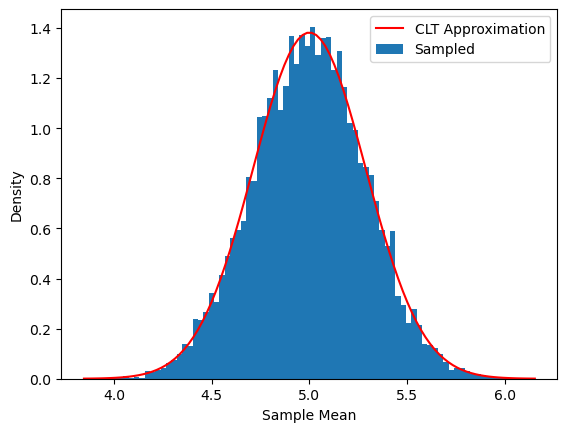

In [72]:
# Example to illustrate the central limit theorem
# Create a distribution to sample from
dist = uniform(loc = 0, scale = 10)
# Other options to try (uncomment one at a time, or add your own):
# dist = expon(scale = 1/3)
# dist = norm(loc = -3, scale = 2)

# Get mean and variance of the distribution
mean = dist.mean()
variance = dist.var()

# Sample from the distribution
nSets = 10000
nSetSize = 100
samples = dist.rvs(size=(nSetSize, nSets))

# Compute the sample means
sampleMeans = np.mean(samples, axis=0)

# Plot the histogram of the sample means
plt.hist(sampleMeans, bins=80, density=True)

# Add the analytical distribution to the plot
x = np.linspace(mean-4*np.sqrt(variance/nSetSize), mean+4*np.sqrt(variance/nSetSize), 100)
pdf = norm.pdf(x, loc=mean, scale=np.sqrt(variance/nSetSize))
plt.plot(x, pdf, 'r-')
plt.xlabel('Sample Mean')
plt.ylabel('Density')
plt.legend(['CLT Approximation','Sampled'])
plt.show()
